# Homework Stage 09 - Feature Engineering (1st Use Case)

Tasks:
Create 2-3 Engineering Features in Data set (include implementation code, markdown explanation of reasoning, and visualization of correlation check)
1. Open the starter notebook (stage09_feature-engineering_homework-starter.ipynb).
2. Replace the sample synthetic data with your project dataset.
3. Implement at least 2 new features.
4. Document each with a short rationale.
5. (Optional) Plot or test correlation with target variable.
6. Save and commit.

In [11]:
import pandas as pd
import numpy as np

#import Library and Creating the Data Set
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from scipy.stats import skew, kurtosis
sns.set(context='talk', style='whitegrid')
np.random.seed(8)
pd.set_option('display.max_columns', 100)

# === Synthetic data generator (adapt or replace with your own data) ===
n = 160
df = pd.DataFrame({
    'date': pd.date_range('2021-02-01', periods=n, freq='D'),
    'region': np.random.choice(['North','South','East','West'], size=n),
    'age': np.random.normal(40, 8, size=n).clip(22, 70).round(1),
    'income': np.random.lognormal(mean=10.6, sigma=0.3, size=n).round(2),
    'transactions': np.random.poisson(lam=3, size=n),
    'credit_score': np.random.normal(680, 50, n).astype(int)

})
base = df['income'] * 0.0015 + df['transactions']*18 + np.random.normal(0, 40, size=n)
df['spend'] = np.maximum(0, base).round(2)

In [12]:
#check the data set
df.head()

,date,region,age,income,transactions,credit_score,spend
0,2021-02-01,West,37.6,28086.81,4,629,141.37
1,2021-02-02,North,43.0,33034.75,1,661,67.54
2,2021-02-03,South,38.2,50045.39,2,705,77.84
3,2021-02-04,South,24.9,39467.28,4,700,151.02
4,2021-02-05,South,59.8,31201.65,1,707,20.87


## 1st Assignment: Analysis/Capture proportionality of spending to earning
Code snippet: df['spend_income_ratio'] = df['monthly_spend'] / df['income']

In [13]:
#Code snippet: df['spend_income_ratio'] = df['monthly_spend'] / df['income']

df['spend_income_ratio'] = df['spend'] / df['income']

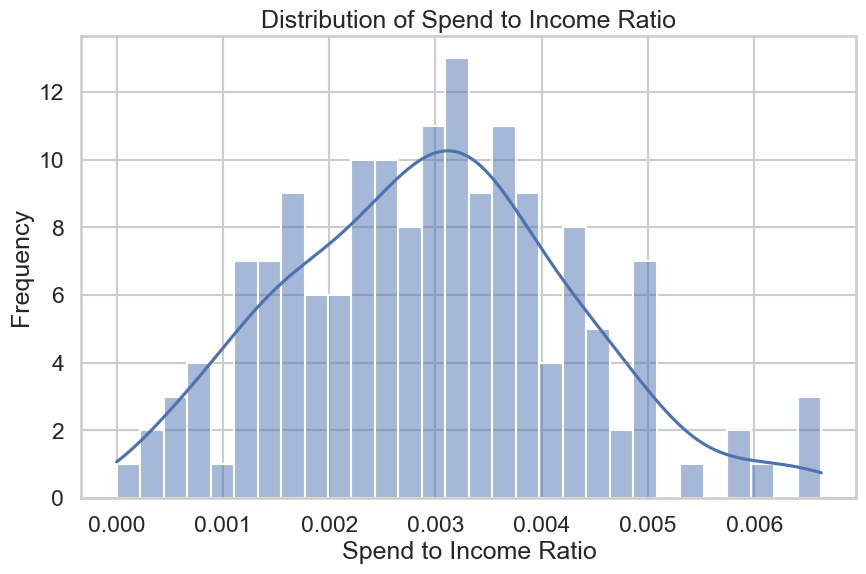

In [14]:
#visualization
plt.figure(figsize=(10, 6))
sns.histplot(df['spend_income_ratio'].dropna(), bins=30, kde=True)
plt.title('Distribution of Spend to Income Ratio')
plt.xlabel('Spend to Income Ratio')
plt.ylabel('Frequency')
plt.savefig("processed_spend-income-ratio-distribution.png", dpi=300, bbox_inches="tight")
plt.show()


## Rationale for Analysis of Spend to Income Ratio

The spend-to-income ratio is a useful derived feature because it provides a normalized measure of customer spending relative to their income. While absolute spending levels can be influenced by income size, the ratio highlights spending efficiency or intensity. For example, two customers may both spend $500, but if one earns $2,000 and the other earns $10,000, their spending behavior has very different implications. By creating this ratio, we can compare customers on a common scale regardless of income level.

The histogram shows the distribution of spend-to-income ratios across all customers in the dataset. This visualization helps identify whether most customers spend a consistent proportion of their income, or if there are significant variations. Peaks in the distribution suggest typical spending behaviors, while long tails or outliers indicate customers who either spend unusually little or disproportionately high relative to their income. Such insights are valuable both for feature engineering in predictive modeling (e.g., as an indicator of high-value or risk-prone customers) and for business interpretation of spending patterns.
